
## Code Section 1 - Data Loading
## Pandas

In [71]:
#Code Block 1.1
# import packages
import numpy as np
import pandas as pd
import math

In [72]:
#Code Block 1.2
df = pd.read_csv('dataset_1.txt', sep=',', header=None)  # use pandas to read csv file
print('The dataset contains %d rows.' % len(df));
df.head() # show first 5 rows of the dataset

The dataset contains 245576 rows.


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.092478,0.14400,-0.009739,231.24,42.410,181.19,-0.13840,-0.85828,0.101680,32.813,...,-6.607700,-15.092,38.214,-0.90671,-0.43698,-0.52616,-91.394,33.158,4.2875,1
1,0.057310,0.16003,-0.009739,238.56,51.564,174.59,-0.15410,-0.86636,0.069517,46.727,...,-5.143100,-18.021,37.482,-0.94272,-0.32132,-0.49881,-82.606,36.087,-1.5711,1
2,0.022143,0.18408,-0.038329,243.69,59.620,166.17,-0.15410,-0.89867,0.053434,57.346,...,-3.678400,-20.584,37.116,-0.92271,-0.21722,-0.46756,-75.283,37.552,-5.9651,1
3,-0.001302,0.20412,-0.030160,246.62,65.112,156.29,-0.16981,-0.90675,0.049414,65.768,...,-0.749080,-23.514,35.285,-0.89070,-0.13626,-0.45193,-69.424,37.552,-8.8945,1
4,-0.032562,0.20813,-0.026076,250.64,70.605,145.30,-0.16981,-0.90675,0.081579,69.063,...,-0.016749,-24.246,33.088,-0.89870,-0.10927,-0.48709,-63.566,39.017,-10.3590,1


In [73]:
#Code Block 1.3
def loadDataFromSensorFiles(list_of_filenames):

    
    for dataset_file in list_of_filenames:

        #import the file contents into a panadas data frame
        imported_data = pd.read_csv(dataset_file, sep=',', header=None)

        #look for number of records in each activitiy
        for activityNumber in range(1,14):
            
            #get all data relating to that activity and convert to a numpy ndarray
            activity_data = imported_data[imported_data[24] == activityNumber].values

            
            number_of_activity_samples = int( len(activity_data) )
            print(  "File " + dataset_file +
                    " has " + str(number_of_activity_samples) + " samples "+
                    "for activity: " + str(activityNumber))
            


In [74]:
#Code Block 1.4
sample_fileName = []
sample_fileName.append ('dataset_1.txt')
sample_fileName.append ('dataset_3.txt')
loadDataFromSensorFiles (sample_fileName)

File dataset_1.txt has 12290 samples for activity: 1
File dataset_1.txt has 12289 samples for activity: 2
File dataset_1.txt has 12289 samples for activity: 3
File dataset_1.txt has 24578 samples for activity: 4
File dataset_1.txt has 12289 samples for activity: 5
File dataset_1.txt has 18433 samples for activity: 6
File dataset_1.txt has 52021 samples for activity: 7
File dataset_1.txt has 6964 samples for activity: 8
File dataset_1.txt has 6965 samples for activity: 9
File dataset_1.txt has 25397 samples for activity: 10
File dataset_1.txt has 24577 samples for activity: 11
File dataset_1.txt has 24577 samples for activity: 12
File dataset_1.txt has 12907 samples for activity: 13
File dataset_3.txt has 12084 samples for activity: 1
File dataset_3.txt has 12289 samples for activity: 2
File dataset_3.txt has 12290 samples for activity: 3
File dataset_3.txt has 24577 samples for activity: 4
File dataset_3.txt has 12289 samples for activity: 5
File dataset_3.txt has 15566 samples for act

In [75]:
#Challenge:


#Question 1
#
#What is the meaning of each column in the output from executing code block 1.2?
# There're a total of 4 sensor group locations: Wrist, Chest, Hip and Ankle. 
# Each sensor group has got 2 types of sensors: Accelerometer and Gyroscope. 
# The Accelerometer measuring linear acceleration is in 3 axes and the Gyroscope measuring angular rotation is also in 3 axes.
# The last number (25th) states what activity the data is related to. 
# Reference: Week 4 Lecture slide Page 44


#Question 2
#
#What is the meaning of each output from executing code block 1.4?
#

#Question 3
#
#What is the activity name for activity with index 10?
#



## Code Section 2- Signal Processing
## Matplotlib

In [76]:
#code block 2.1
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

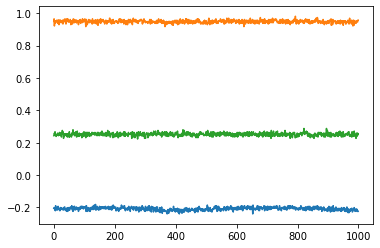

In [77]:
#code block 2.2
%matplotlib inline
df_sitting = df[df[24] == 1].values 
plt.plot(df_sitting[500:1500, 0:3]) # We could plot muliple lines in the same plot



For raw sensor data, it usually contains noise that arises from different sources, such as sensor mis
calibration, sensor errors, errors in sensor placement, or noisy environments. We could apply filter to remove noise of sensor data
to smooth data.

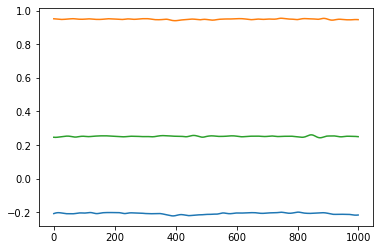

In [78]:
#code block 2.3
from scipy import signal

b, a = signal.butter(4, 0.04, 'lowpass', analog=False)
for i in range(3):
    df_sitting[:,i] = signal.lfilter(b, a, df_sitting[:, i])
plt.plot(df_sitting[500:1500, 0:3])


In [79]:
#Code Block 2.4
def loadDataFromSensorFilesWithDataCleaning(list_of_filenames):

    
    for dataset_file in list_of_filenames:

        #import the file contents into a panadas data frame
        imported_data = pd.read_csv(dataset_file, sep=',', header=None)

        #look for number of records in each activitiy
        for activityNumber in range(1,14):
            
            #get all data relating to that activity and convert to a numpy ndarray
            activity_data = imported_data[imported_data[24] == activityNumber].values
            
            #print out some raw sensor data for activity with index 10 
            if activityNumber == 10:
                plt.figure(0)
                plt.plot(activity_data[500:1500, 3:6]) # We could plot muliple lines in the same plot

            #smooth over the data for columns 0, 1, 2, ...23 (not column 24)
            b, a = signal.butter(4, 0.04, 'low', analog=False)
            for j in range(24):
                activity_data[:, j] = signal.lfilter(b, a, activity_data[:, j])
            
            #print out some noise filtered sensor data for activity with index 10
            if activityNumber == 10:   
                plt.figure(1)
                plt.plot(activity_data[500:1500, 3:6]) # We could plot muliple lines in the same plot    
            
            
            
            


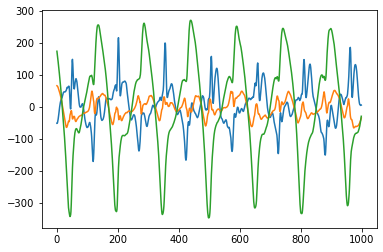

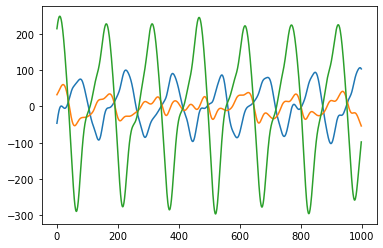

In [80]:
#Code Block 2.5
sample_fileName = []
sample_fileName.append ('dataset_1.txt')
loadDataFromSensorFilesWithDataCleaning (sample_fileName)

In [81]:
#Challenge:


#Question 1
#
#What are the output from executing code block 2.2? (Hint: think of the activity, the sensor and number of sensor 
#records used)?
# It's plotting the Accelerometer readouts from record 500 to 1500 wherever the record is tagged as Activity 1 (Sitting). 


#Question 2
#
#What is the meaning of each output from executing code block 2.3 (Hint: think of the difference from the output 
#executing code block 2.2)?
# 


#Question 3
#
#What are the outputs from executing code block 2.5? (Hint:think of the activity, the sensor and number of sensor 
#records used, and the difference from two plots output)
#


## Code Section 3:  Feature Engineering
## Numpy 

For time series data, we should convert the raw dataset to feature dataset, where each data sample contains features extracted from a period of time. For example, in the last cell we plot the period of time from 500 to 1500. Now we can consider it as a segmentation and extract statistic features from it. In this tutorial, we extract min value and max value of accelerometer data of wrist sensor as features. In data visualization we could find that for different activities the sensor signal data values are in different ranges. Therefore, we could think that we could recognize different activities by the range of data, which means minimum and maximum values of data may be useful features to recognize activities.     

In [82]:
#code block 3.1
seg = df_sitting[500:1500, 0:]
ax_min = np.min(seg[:, 0])
ax_max = np.max(seg[:, 0])
ay_min = np.min(seg[:, 1])
ay_max = np.max(seg[:, 1])
az_min = np.min(seg[:, 2])
az_max = np.max(seg[:, 2])
print([ax_min, ax_max, ay_min, ay_max, az_min, az_max, int(seg[0, 24])])

[-0.22194265347765907, -0.19935836657775846, 0.940228356106631, 0.9548131625616393, 0.2432672903705879, 0.2607813895652679, 1]


for each accelerometer axis data of the first senosr in the period, we extract 2 statistic feature min and max value. Now the data segmentation for activity sitting is represented the (1 * 7) vector. The first six numbers are features and the last number is the label.  

In [83]:
#Code Block 3.2
def create_training_data_from_files(list_of_filenames, output_filename):

    #create the empty training set where we are going to add our "features"
    training_set = np.empty(shape=(0, 10))
    
    for dataset_file in list_of_filenames:

        #import the file contents into a panadas data frame
        imported_data = pd.read_csv(dataset_file, sep=',', header=None)

        #generate "features" for each activitiy
        for activityNumber in range(1,14):
            
            #get all data relating to that activity and convert to a numpy ndarray
            activity_data = imported_data[imported_data[24] == activityNumber].values

            #smooth over the data for columns 0, 1, 2, ...23 (not column 24)
            b, a = signal.butter(4, 0.04, 'low', analog=False)
            for j in range(24):
                activity_data[:, j] = signal.lfilter(b, a, activity_data[:, j])
            
            #how many full rows of 1000 are there for this activity data?
            number_of_training_windows = int( len(activity_data)/1000 )
            print(  "File " + dataset_file +
                    " has " + str(number_of_training_windows) + " windows, each of which has 1000 rows "+
                    "for activity: " + str(activityNumber))
            
            #for each window of 1000 rows... scan the data and add the scan results to training_set
            for window_number in range(number_of_training_windows):
                #sample data (get the next 1000 rows and all the columns)
                window_data = activity_data[ 
                                1000 * window_number : 1000 * (window_number + 1) , 
                                :
                            ]
                #we are about to build up a feature_sample that will have 10 columns
                feature_window = []
                #sample from file 4 in week 7 prac
                for i in range(3):
                    feature_window.append(np.min(window_data[:, i]))
                    feature_window.append(np.max(window_data[:, i]))
                    feature_window.append(np.mean(window_data[:, i]))
                # add the activtiy number (The last column from the row of data)
                feature_window.append(int(window_data[0, -1])) 
                #make it in to an ndarray so it can be added to training data
                feature_window = np.array([feature_window]) 
                training_set = np.concatenate((training_set, feature_window), axis=0)
            
    #now save all this training data into a file to be used at a later date
    df_training = pd.DataFrame(training_set)
    df_training.to_csv(output_filename, index=None, header=None)
    print('attempted to create training feature set data file:'+ output_filename +'. Please check if the file was created successfully in your local folder!')
    print(str(len(training_set)) + " data rows should be in the output training feature set file")



In [84]:
#Code Block 3.3
sample_fileName = []
sample_fileName.append ('dataset_1.txt')
sample_fileName.append ('dataset_3.txt')
create_training_data_from_files (sample_fileName, 'featureset_1and3.csv')

File dataset_1.txt has 12 windows, each of which has 1000 rows for activity: 1
File dataset_1.txt has 12 windows, each of which has 1000 rows for activity: 2
File dataset_1.txt has 12 windows, each of which has 1000 rows for activity: 3
File dataset_1.txt has 24 windows, each of which has 1000 rows for activity: 4
File dataset_1.txt has 12 windows, each of which has 1000 rows for activity: 5
File dataset_1.txt has 18 windows, each of which has 1000 rows for activity: 6
File dataset_1.txt has 52 windows, each of which has 1000 rows for activity: 7
File dataset_1.txt has 6 windows, each of which has 1000 rows for activity: 8
File dataset_1.txt has 6 windows, each of which has 1000 rows for activity: 9
File dataset_1.txt has 25 windows, each of which has 1000 rows for activity: 10
File dataset_1.txt has 24 windows, each of which has 1000 rows for activity: 11
File dataset_1.txt has 24 windows, each of which has 1000 rows for activity: 12
File dataset_1.txt has 12 windows, each of which ha

In [85]:
#Challenge:


#Question 1
#
#What are the output from executing code block 3.1? (Hint: think of the activity and the sensor)
#


#Question 2
#
#After executing code block 3.3, there is a definition of window, what exactly is the window? (Hint: think from 
#feature engineering perspective, shall we retrieve one specific numeric feature, for instance max for the X axle 
#of the first gyroscope sensor in the dataset used for the HAR project? why yes? why not?)
#

#Question 3
#
#After executing code block 3.3, what patterns you can see from the output difference/similarity between dataset_1 
#and dataset_3? (Hint: think from the number of windows for each activity)



## Code Section 4 (Bonus Section):  Model Training and Inference
## Numpy 

In [86]:
#Code Block 4.1
import numpy as np 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt 
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [87]:
#Code Block 4.2
def create_testing_data_from_files(list_of_filenames, output_filename):

    #create the empty training set where we are going to add our "features"
    testing_set = np.empty(shape=(0, 10))
    
    for dataset_file in list_of_filenames:

        #import the file contents into a panadas data frame
        imported_data = pd.read_csv(dataset_file, sep=',', header=None)

        #generate "features" for each activitiy
        for activityNumber in range(1,14):
            
            #get all data relating to that activity and convert to a numpy ndarray
            activity_data = imported_data[imported_data[24] == activityNumber].values

            #smooth over the data for columns 0, 1, 2, ...23 (not column 24)
            b, a = signal.butter(4, 0.04, 'low', analog=False)
            for j in range(24):
                activity_data[:, j] = signal.lfilter(b, a, activity_data[:, j])
            
            #how many full rows of 1000 are there for this activity data?
            number_of_testing_windows = int( len(activity_data)/1000 )
            print(  "File " + dataset_file +
                    " has " + str(number_of_testing_windows) + " windows, each of which has 1000 rows "+
                    "for activity: " + str(activityNumber))
            
            #for each window of 1000 rows... scan the data and add the scan results to training_set
            for window_number in range(number_of_testing_windows):
                #sample data (get the next 1000 rows and all the columns)
                window_data = activity_data[ 
                                1000 * window_number : 1000 * (window_number + 1) , 
                                :
                            ]
                #we are about to build up a feature_sample that will have 10 columns
                feature_window = []
                #sample from file 4 in week 7 prac
                for i in range(3):
                    feature_window.append(np.min(window_data[:, i]))
                    feature_window.append(np.max(window_data[:, i]))
                    feature_window.append(np.mean(window_data[:, i]))
                # add the activtiy number (The last column from the row of data)
                feature_window.append(int(window_data[0, -1])) 
                #make it in to an ndarray so it can be added to training data
                feature_window = np.array([feature_window]) 
                testing_set = np.concatenate((testing_set, feature_window), axis=0)
            
    #now save all this training data into a file to be used at a later date
    df_testing = pd.DataFrame(testing_set)
    df_testing.to_csv(output_filename, index=None, header=None)
    print('attempted to create testing feature set data file:'+ output_filename +'. Please check if the file was created successfully in your local folder!')
    print(str(len(testing_set)) + " data rows should be in the output testing set file")



In [88]:
#Code Block 4.3
create_training_data_from_files (sample_fileName, 'week5_training_data_1Participant.csv')
create_testing_data_from_files (sample_fileName, 'week5_testing_data_1Participant.csv')

File dataset_1.txt has 12 windows, each of which has 1000 rows for activity: 1
File dataset_1.txt has 12 windows, each of which has 1000 rows for activity: 2
File dataset_1.txt has 12 windows, each of which has 1000 rows for activity: 3
File dataset_1.txt has 24 windows, each of which has 1000 rows for activity: 4
File dataset_1.txt has 12 windows, each of which has 1000 rows for activity: 5
File dataset_1.txt has 18 windows, each of which has 1000 rows for activity: 6
File dataset_1.txt has 52 windows, each of which has 1000 rows for activity: 7
File dataset_1.txt has 6 windows, each of which has 1000 rows for activity: 8
File dataset_1.txt has 6 windows, each of which has 1000 rows for activity: 9
File dataset_1.txt has 25 windows, each of which has 1000 rows for activity: 10
File dataset_1.txt has 24 windows, each of which has 1000 rows for activity: 11
File dataset_1.txt has 24 windows, each of which has 1000 rows for activity: 12
File dataset_1.txt has 12 windows, each of which ha

In [89]:
#Code Block 4.4
df_training = pd.read_csv('week5_training_data_1Participant.csv', header=None)
df_testing = pd.read_csv('week5_testing_data_1Participant.csv', header=None)

label_train = df_training[9].values
# Labels should start from 0 in sklearn
label_train = label_train - 1
df_training = df_training.drop([9], axis=1)
data_train = df_training.values

label_test = df_testing[9].values
label_test = label_test - 1
df_testing = df_testing.drop([9], axis=1)
data_test = df_testing.values

# Feature normalization for improving the performance of machine learning models. In this example code, 
# StandardScaler is used to scale original feature to be centered around zero. You could try other normalization methods.
scaler = preprocessing.StandardScaler().fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

# Build KNN classifier, in this example code
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_test, label_train)

# Evaluation. when we train a machine learning model on training set, we should evaluate its performance on testing set.
# We could evaluate the model by different metrics. Firstly, we could calculate the classification accuracy. In this example
# code, when n_neighbors is set to 4, the accuracy achieves 0.757.
label_pred = knn.predict(data_test)
print('Accuracy: ', accuracy_score(label_test, label_pred))
# We could use confusion matrix to view the classification for each activity.
print(confusion_matrix(label_test, label_pred))



Accuracy:  0.9205020920502092
[[ 23   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0  23   1   0   0   0   0   0   0   0   0   0   0]
 [  0   1  21   0   0   0   2   0   0   0   0   0   0]
 [  0   0   0  47   0   1   0   0   0   0   0   0   0]
 [  0   0   0   2  21   1   0   0   0   0   0   0   0]
 [  0   0   0   3   2  26   2   0   0   0   0   0   0]
 [  0   0   0   0   0   3 102   0   2   0   0   0   0]
 [  0   0   0   0   0   0   3  10   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0  13   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  49   0   0   0]
 [  1   0   0   2   0   0   1   0   0   0  42   2   0]
 [  0   1   0   2   0   0   1   0   0   0   2  42   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  21]]


In [90]:
#Challenge:


#Question 1
#
#After executing code block 4.3, do you notice there are two new files generated in your local folder?
#what are the difference between these two files? (Hint: think from the lecture, what is the difference between 
#model training and model inference?)


#Question 2
#
#After executing code block 4.4, you see an accurarcy value? What does the value mean? 
# (Hint: think from the very purpose of the IoT project creating the underlying dataset)


#Question 3
#
#After executing code block 4.4, there is an matrix output. Why it takes a while to output? what are the columns 
#and what are the rows?  (Hint: think of a math function someone wrote in C/Java/Python which outputs a value, you don't know whether the math 
#function you wrote is correct? what would you need to make sure? What if there are multiple math functions?)
